<a href="https://colab.research.google.com/github/olimpiojunior/Dados-Goggle-Colaboratory/blob/master/QuarentenaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print("Hello World")

Hello World


#Iniciando estudos com Pandas
Vamos aprender como extrair dados usando o Pandas

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Nessa células pegamos o data frame direto de um diretório na web

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


É possível obter um relatório de indormações sobre a variável utilizando o "?"

In [0]:
filmes?

In [0]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.shape

(100836, 4)

In [0]:
avaliacoes.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

Mudando os nomes das colunas

In [0]:
avaliacoes.columns = ["usuariosId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuariosId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Aqui é feito um requerimento de todos os filmes de Id igual a 1

In [0]:
filmeId_1 = avaliacoes.query("filmeId == 1")

Extraindo a descrição das colunas

In [0]:
avaliacoes.describe()

,usuariosId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Extraindo apenas a coluna Notas

In [0]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

Requerimento da média da coluna nota somente do filme de Id igual a 1

---



In [0]:
avaliacoes.query("filmeId==1")["nota"].mean()

3.9209302325581397

Extraindo a média da coluna nota com a coluna filmeId agrupada

In [0]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.round(decimals=2)

filmeId
1         3.92
2         3.43
3         3.26
4         2.36
5         3.07
          ... 
193581    4.00
193583    3.50
193585    3.50
193587    3.50
193609    4.00
Name: nota, Length: 9724, dtype: float64

Aqui é feito um join com a média das notas dos filmes e a tabela filmes

In [0]:
filme_com_media = filmes.join(notas_medias_por_filme, on = "filmeId")
filme_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Mudando o nome de uma coluna notas para media

In [0]:
filme_com_media = filme_com_media.rename(columns={"nota": "media"})
filme_com_media.head()

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Ordenando por maior média de nota através da função Sort()

In [0]:
filme_com_media.sort_values("media", ascending = False).head()

,filmeId,titulo,generos,media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0


Número de avaliações por filme

In [0]:
qtd_avaliacoes_por_filme = avaliacoes.groupby("filmeId")["nota"].count()
qtd_avaliacoes_por_filme.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: nota, dtype: int64

Aqui é feito mais um join com a quantidade por filme e a coluna filmeId

In [0]:
filmes_com_media_qtd = filme_com_media.join(qtd_avaliacoes_por_filme, on = "filmeId")
filmes_com_media_qtd.head()

,filmeId,titulo,generos,media,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


Renomeando a coluna com a quantidade de notas por filme

In [0]:
filmes_com_media_qtd = filmes_com_media_qtd.rename(columns = {'nota':'qtd.Avaliacoes'})
filmes_com_media_qtd.head()

,filmeId,titulo,generos,media,qtd.Avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


Atribuindo as mudanças para o dataframe new filmes

In [0]:
new_filmes = filmes_com_media_qtd
new_filmes.head()

,filmeId,titulo,generos,media,qtd.Avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


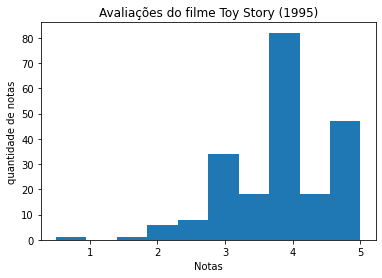

In [0]:
avaliacoes.query("filmeId==1")["nota"].plot(kind = 'hist', title = "Avaliações do filme Toy Story (1995)")
plt.xlabel("Notas")
plt.ylabel("quantidade de notas")
plt.show()

Arredondando as médias para duas casas decimais

In [0]:
media_arr = new_filmes["media"].round(decimals = 2)

In [0]:
new_filmes["media"] = media_arr
new_filmes.head()

,filmeId,titulo,generos,media,qtd.Avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


Descobrindo os generos dos filmes

In [0]:
ordenar_generos = new_filmes.generos.sort_values()
genero_anterior = ordenar_generos[0]

for gen in ordenar_generos[1:]:
  if gen == genero_anterior:
    pass
  else:
    print(genero_anterior)
    genero_anterior = gen

Adventure|Animation|Children|Comedy|Fantasy
(no genres listed)
Action
Action|Adventure
Action|Adventure|Animation
Action|Adventure|Animation|Children
Action|Adventure|Animation|Children|Comedy
Action|Adventure|Animation|Children|Comedy|Fantasy
Action|Adventure|Animation|Children|Comedy|IMAX
Action|Adventure|Animation|Children|Comedy|Romance
Action|Adventure|Animation|Children|Comedy|Sci-Fi
Action|Adventure|Animation|Children|Comedy|Sci-Fi|IMAX
Action|Adventure|Animation|Children|Comedy|Western
Action|Adventure|Animation|Children|Fantasy
Action|Adventure|Animation|Children|Fantasy|Sci-Fi
Action|Adventure|Animation|Children|Sci-Fi
Action|Adventure|Animation|Comedy
Action|Adventure|Animation|Comedy|Crime|Mystery
Action|Adventure|Animation|Comedy|Fantasy|Mystery|Sci-Fi
Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi
Action|Adventure|Animation|Comedy|Sci-Fi
Action|Adventure|Animation|Comedy|Thriller
Action|Adventure|Animation|Crime|Fantasy
Action|Adventure|Animation|Drama
Action|Adventure|

Quantidade de filmes por genero

In [0]:
Qtd_genero = new_filmes.groupby("generos")["generos"].count()
Qtd_genero.head(10)

generos
(no genres listed)                                    34
Action                                                60
Action|Adventure                                      32
Action|Adventure|Animation                            18
Action|Adventure|Animation|Children                    6
Action|Adventure|Animation|Children|Comedy             5
Action|Adventure|Animation|Children|Comedy|Fantasy     3
Action|Adventure|Animation|Children|Comedy|IMAX        2
Action|Adventure|Animation|Children|Comedy|Romance     1
Action|Adventure|Animation|Children|Comedy|Sci-Fi      3
Name: generos, dtype: int64